In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("bitcoin.csv")
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [3]:
prediction_days = 120
df_train= Real_Price[len(Real_Price)-prediction_days:]
df_test= Real_Price[:len(Real_Price)-prediction_days]

In [4]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 100, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics='accuracy')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.2990 - accuracy: 0.0084 
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.0084
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1466 - accuracy: 0.0084
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.0084
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.0168
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.0168
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.0168
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.0168
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.0168
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.0168
Epoch 11

24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0168
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0168    
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168    
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168    
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168    
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.0168
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 0.01

In [6]:
test_set = df_test.values[1:]
sc = MinMaxScaler()
inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1))
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

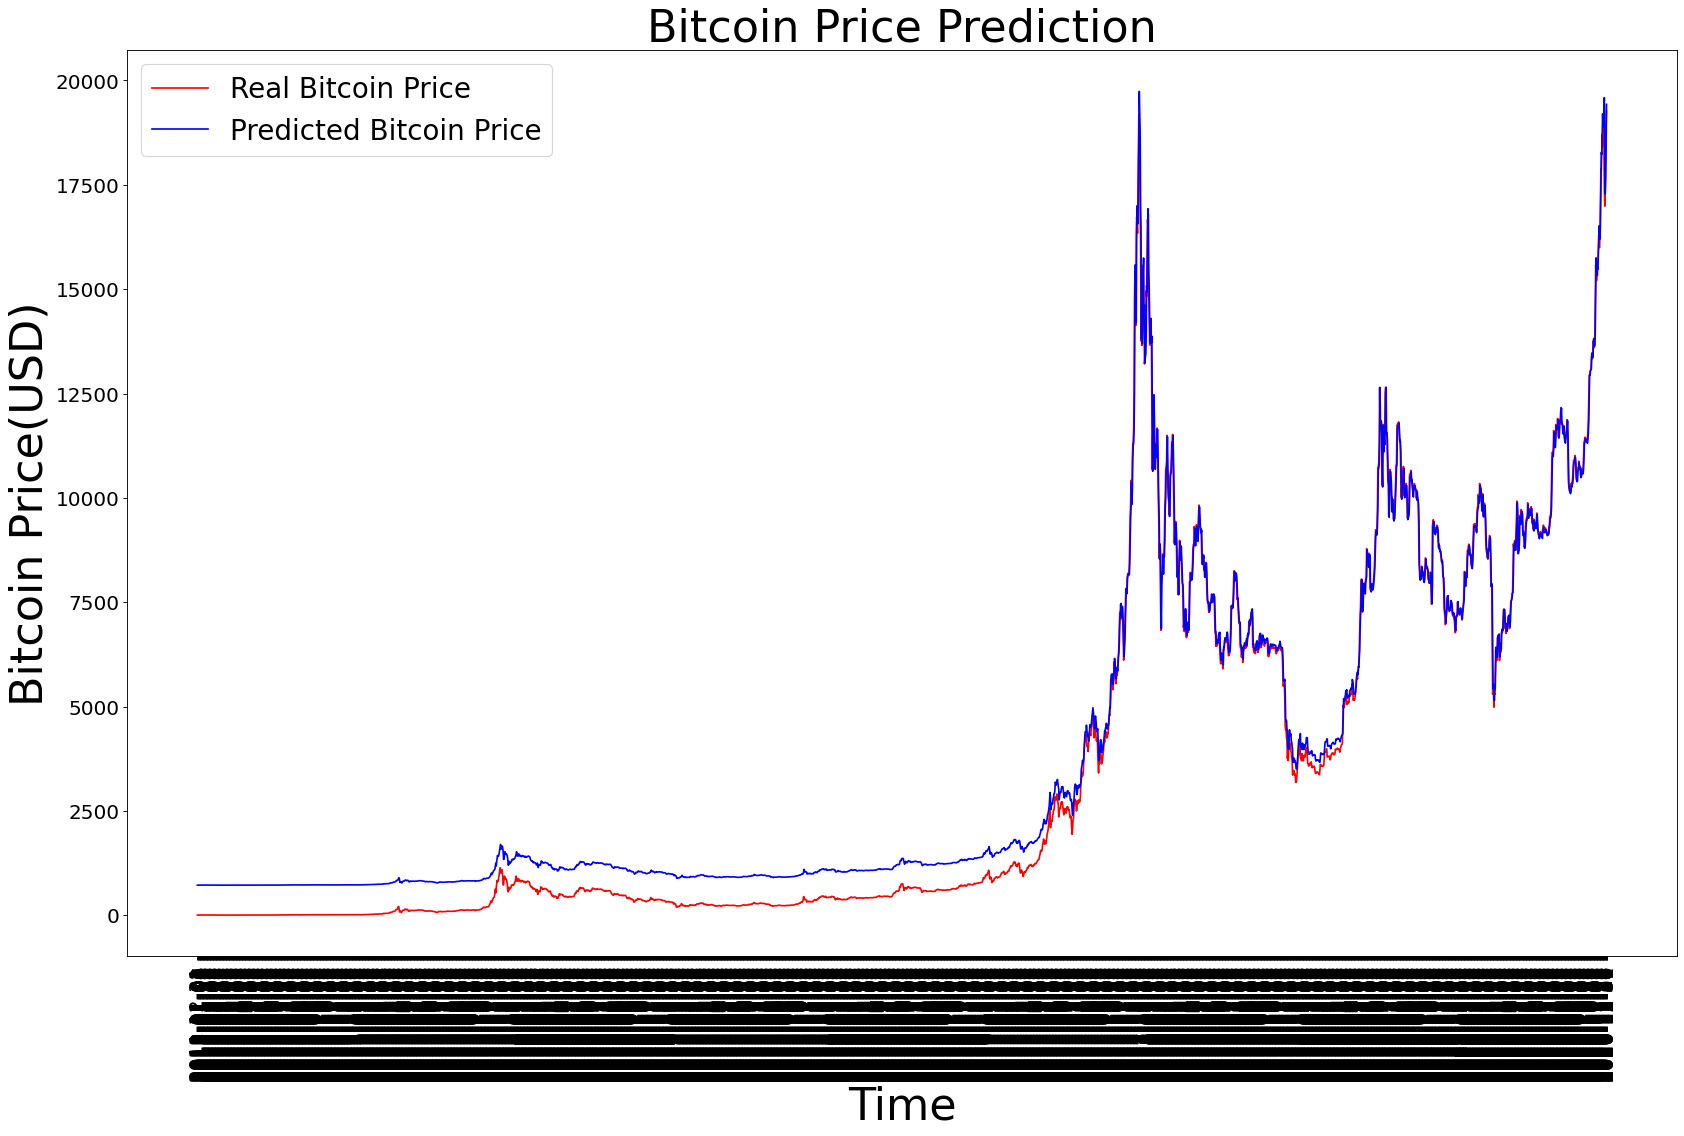

In [7]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Bitcoin Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()